<h1>Mushroom Classification</h1>
<i>Note: This data set was obtained from archive.ics.uci.edu and is titled "mushroom"</i>

_______________________________________________________________________


<b>Goal:</b> predict if a mushroom is edible or poisonous based on the mushroom's attributes.
_______________________________________________________________________

First, get the data

In [16]:
import os
import pandas as pd

# Folder path to mushroom data file
MUSHROOM_PATH = ""

def load_mushroom_data(mushroom_path=MUSHROOM_PATH):
    csv_path = os.path.join(mushroom_path, "agaricus-lepiota.csv")
    return pd.read_csv(csv_path)

Examine the data

In [17]:
mushroom_full = load_mushroom_data()
mushroom_full.head()

,consumption,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [18]:
mushroom_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   consumption               8416 non-null   object
 1   cap-shape                 8416 non-null   object
 2   cap-surface               8416 non-null   object
 3   cap-color                 8416 non-null   object
 4   bruises?                  8416 non-null   object
 5   odor                      8416 non-null   object
 6   gill-attachment           8416 non-null   object
 7   gill-spacing              8416 non-null   object
 8   gill-size                 8416 non-null   object
 9   gill-color                8416 non-null   object
 10  stalk-shape               8416 non-null   object
 11  stalk-root                8416 non-null   object
 12  stalk-surface-above-ring  8416 non-null   object
 13  stalk-surface-below-ring  8416 non-null   object
 14  stalk-color-above-ring  

In [19]:
mushroom_full.describe()

,consumption,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,...,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,...,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
freq,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,...,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


For later, let's take a peak at all the attributes so we can see if and where the '?' values are

In [20]:
for col in mushroom_full.columns:
    print(mushroom_full[col].value_counts())

EDIBLE       4488
POISONOUS    3928
Name: consumption, dtype: int64
CONVEX     3796
FLAT       3292
KNOBBED     840
BELL        452
SUNKEN       32
CONICAL       4
Name: cap-shape, dtype: int64
SCALY      3268
SMOOTH     2684
FIBROUS    2460
GROOVES       4
Name: cap-surface, dtype: int64
BROWN       2320
GRAY        2096
RED         1500
YELLOW      1072
WHITE       1040
BUFF         168
PINK         144
CINNAMON      44
GREEN         16
PURPLE        16
Name: cap-color, dtype: int64
NO         5040
BRUISES    3376
Name: bruises?, dtype: int64
NONE        3808
FOUL        2160
FISHY        576
SPICY        576
ANISE        400
ALMOND       400
PUNGENT      256
CREOSOTE     192
MUSTY         48
Name: odor, dtype: int64
FREE        8200
ATTACHED     216
Name: gill-attachment, dtype: int64
CLOSE      6824
CROWDED    1592
Name: gill-spacing, dtype: int64
BROAD     5880
NARROW    2536
Name: gill-size, dtype: int64
BUFF         1728
PINK         1556
WHITE        1232
BROWN        1112
CHOC

Notice that <b>only</b> attribute that has a '?' is "stalk-shape".

<i>Take note of this for later.</i>

# Visualizations and Correlations

Let's look at the correlation between the attributes and being poisonous or edible.

In [21]:
result = mushroom_full.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
correlation_consumption = result[['consumption']].drop('consumption').sort_values(by='consumption', ascending=False)
print(correlation_consumption)

                          consumption
odor                         0.883252
stalk-surface-above-ring     0.547118
ring-type                    0.533758
stalk-surface-below-ring     0.499321
spore-print-color            0.496691
bruises?                     0.462454
gill-color                   0.442214
gill-spacing                 0.383756
habitat                      0.187146
stalk-shape                  0.122572
stalk-root                   0.115479
cap-shape                    0.102253
stalk-color-above-ring       0.101152
stalk-color-below-ring       0.094249
cap-color                    0.077899
cap-surface                  0.020349
gill-attachment             -0.115691
ring-number                 -0.126453
veil-color                  -0.137041
population                  -0.388632
gill-size                   -0.540032
veil-type                         NaN


Notice that the 'veil-type' attribute had a "Not a Number" correlation. This is because the attribute is always the same. All 8140 of 8140 mushrooms had a veil-type of 'partial'. This would mean future data that would have a different attribute would need to be subject to smoothing.


It appears that Odor has the best correlation.

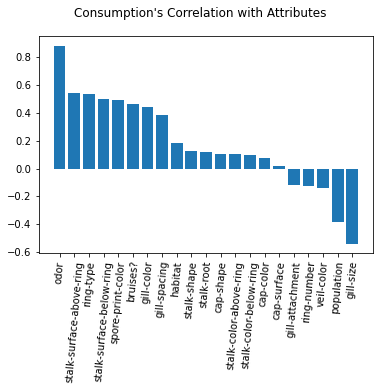

In [22]:
import matplotlib.pyplot as plt

keys = list(correlation_consumption.index)
values = list(correlation_consumption.values)
adjustedVals = []

for v in values:
        adjustedVals.append(v[0])

adjustedVals.pop()        
keys.pop()

fig, axs = plt.subplots()
axs.bar(keys, adjustedVals)
plt.xticks(rotation=85)
fig.suptitle('Consumption\'s Correlation with Attributes')
plt.show()

From before, we took notice of the presence of the '?' (unknown attributes).

Let's check the preportion of these in the data.

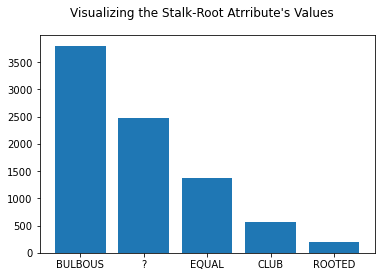

In [23]:
stalk_root_data = dict(mushroom_full["stalk-root"].value_counts())
keys = list(stalk_root_data.keys())
values = list(stalk_root_data.values())
fig, axs = plt.subplots()
axs.bar(keys, values)
fig.suptitle('Visualizing the Stalk-Root Atrribute\'s Values')
plt.show()

# Setting Aside a Test Set

Partition the data into a train and a test set.

In [24]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(mushroom_full, test_size=0.2, random_state=42)
print(len(mushroom_full),len(train_set),len(test_set))

8416 6732 1684


# Data Preparation

Let's address the issue from the previous graph, dealing with the missing stalk-root data.

In [25]:
mushroom_full["stalk-root"].value_counts()

BULBOUS    3800
?          2480
EQUAL      1376
CLUB        568
ROOTED      192
Name: stalk-root, dtype: int64

This is a large amount of the data (2480), so let's remove the 'stalk-root' attribute entirely and see how the models perform without it.

In [26]:
mushroom_train = train_set.drop("consumption", axis=1)
mushroom_train = train_set.drop("stalk-root", axis=1)  # Has missing data, lets try to ignore this attribute.
mushroom_train_labels = train_set["consumption"].copy()

Use an ordinal encoder to encode this categorical data

In [27]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
mushroom_train_data_encoded = encoder.fit_transform(mushroom_train)

# Training the Models

Create the Naive Bayes and fit it

Note: smoothing is used by default

In [28]:
from sklearn.naive_bayes import CategoricalNB

nb = CategoricalNB()
nb.fit(mushroom_train_data_encoded, mushroom_train_labels)
nb.score(mushroom_train_data_encoded, mushroom_train_labels)

0.9985145573380867

It looks like it runs on the training data with 99.8% accuracy.

Let's cross validate to see how that looks.

In [29]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

nb_scores = cross_val_score(nb, mushroom_train_data_encoded, mushroom_train_labels, scoring="accuracy", cv=10)
display_scores(nb_scores)

Scores: [0.99703264 0.99851632 0.99851412 0.99851412 0.99554235 1.
 0.99851412 1.         0.99851412 0.99851412]
Mean: 0.9983661888616012
Standard deviation: 0.001233817578590709


As we can see, Naive Bayes does very well. The median score is 99.8% accuracy with a very tight distrubution of the scores.

Let's see how the decision tree classifier performs. Instantiate and fit it.

In [30]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="gini", splitter="best", max_depth=None, min_samples_split=2, min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dtc.fit(mushroom_train_data_encoded, mushroom_train_labels)
dtc.score(mushroom_train_data_encoded, mushroom_train_labels)

1.0

Interestingly, the values are predicted with perfect accuracy. We may have overfit the data, let's cross validate.

In [31]:
dtc_scores = cross_val_score(dtc, mushroom_train_data_encoded, mushroom_train_labels, scoring="accuracy", cv=10)
display_scores(dtc_scores)

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0
Standard deviation: 0.0


All cross validation only further proves the accuracy of the decision tree for this problem.

<b>I will choose to do the decision tree model on the test set.</b>

Although it is not necessary considering the accuracy, let's see how changing the number of the max features of the DecisionTree affects the performance:


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_features': [2, 3, 4, 5]},
  ]

dtc2 = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(dtc2, param_grid, cv=10,scoring='accuracy', return_train_score=True)
grid_search.fit(mushroom_train_data_encoded, mushroom_train_labels)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_features': [2, 3, 4, 5]}],
             return_train_score=True, scoring='accuracy')

In [33]:
grid_search.best_params_

{'max_features': 3}

In [34]:
grid_search.best_estimator_

DecisionTreeClassifier(max_features=3, random_state=42)

This means that in order to successfully classify our test data, only three of the features were required.

In [35]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.999702823179792 {'max_features': 2}
1.0 {'max_features': 3}
1.0 {'max_features': 4}
1.0 {'max_features': 5}


# Test Set

First, get the test set ready in the same way the training set was.

In [36]:
mushroom_test = test_set.drop("consumption", axis=1)
mushroom_test = test_set.drop("stalk-root", axis=1)  # Has missing data, lets try to ignore this attribute.
mushroom_test_labels = test_set["consumption"].copy()
mushroom_test_data_encoded = encoder.fit_transform(mushroom_test)

Next, score the test set using the decision tree that was created on the test data.

In [37]:
from sklearn.metrics import accuracy_score

final_model = grid_search.best_estimator_

test_prediction = final_model.predict(mushroom_test_data_encoded)
accuracy = accuracy_score(test_prediction, mushroom_test_labels)
print(accuracy)

0.9970308788598575


It appears that the decision tree was able to correctly identify all of the poisionous versus edible mushrooms in the test set with very high accuracy. However, what if we had not limited the number of features used to 3 features?

In [38]:
test_prediction = dtc.predict(mushroom_test_data_encoded)
accuracy = accuracy_score(test_prediction, mushroom_test_labels)
print(accuracy)

1.0


Using all 22 features from the original training set allowed for perfect prediction of the test set.

# Conclusion

To my surprise, all the various models and parameters seem to do a terrific job at predicting poisonous versus non-poisonous mushrooms. Whether or not I would trust this in real life is a different story.

An interesting study would be to start with a small test size and ramp it up, determining the minimum amount of test data that is required to make the model achieve the accuracy we are seeing here (I used a static 80-20 here).